# Final Project: Microplastics Source Identification

## December 4, 2023


### By: Amulya Nagella

Data Source: https://www.ncei.noaa.gov/products/microplastics

In [164]:
#Importing all the necessary packages

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

### Reading in the Data

This data was sourced from NOAA's Marine Microplastics website and was filtered to only include data values from the 21st century (January-01-2000 to December-31-2022).

Note: There is no data for 2023 uploaded into the site yet.

In [165]:
# Reading in the data file as a pandas dataframe

df = pd.read_csv('/home/an691/rcaes/final_project_AmulyaNagella/MarineMicroplastics.csv', parse_dates=['Date'])
df

/tmp/ipykernel_155564/243254888.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('/home/an691/rcaes/final_project_AmulyaNagella/MarineMicroplastics.csv', parse_dates=['Date'])


,FID,Date,Latitude,Longitude,Oceans,Regions,SubRegions,Measurement,Unit,Density Range,...,Sediment Sample Depth (m),Transect Number,Sampling Point on Beach,Volunteers Number,Collecting Time (min),State,Country,Marine Setting,x,y
0,96165,2011-01-22,-29.948200,-20.712000,Atlantic Ocean,NaN,NaN,1.084698,pieces/m3,1-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-2.305649e+06,-3.496893e+06
1,91256,2007-05-18,3.480000,-143.620000,Pacific Ocean,NaN,NaN,0.000000,pieces/m3,0-0.0005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-1.598771e+07,3.876302e+05
2,93248,2012-11-17,4.410000,-145.740000,Pacific Ocean,NaN,NaN,0.001596,pieces/m3,0.0005-0.005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-1.622370e+07,4.914044e+05
3,97754,2018-10-20,3.652681,-49.193139,Atlantic Ocean,NaN,NaN,703.000000,pieces/m3,>=10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-5.476155e+06,4.068903e+05
4,92513,2002-03-21,20.570000,-155.540000,Pacific Ocean,NaN,NaN,0.002160,pieces/m3,0.0005-0.005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-1.731463e+07,2.340679e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16139,90568,2001-07-06,34.560000,-66.130000,Atlantic Ocean,NaN,NaN,0.030236,pieces/m3,0.005-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-7.361558e+06,4.104247e+06
16140,92993,2015-07-14,73.626500,-81.362900,Arctic Ocean,Northwestern Passages,NaN,0.030000,pieces/m3,0.005-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-9.057277e+06,1.236639e+07
16141,88759,2007-02-18,25.630000,-76.980000,Atlantic Ocean,NaN,NaN,0.021600,pieces/m3,0.005-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-8.569374e+06,2.953327e+06
16142,104245,2021-06-05,29.655200,-95.007800,Atlantic Ocean,Gulf of Mexico,NaN,NaN,pieces/10 mins,40-200,...,NaN,NaN,NaN,4.0,10.0,Texas,United States,Beach-Nurdle Patrol,-1.057622e+07,3.459306e+06


In [166]:
# Replacing all the Nan values in the microplastics measurment column with zeros.

# These values are labelled NaN becuase of inaccurate results. For this analysis, it will be assumed that the NaN values are zero pieces/m3.

df['Measurement'] = df['Measurement'].fillna(0)
df

,FID,Date,Latitude,Longitude,Oceans,Regions,SubRegions,Measurement,Unit,Density Range,...,Sediment Sample Depth (m),Transect Number,Sampling Point on Beach,Volunteers Number,Collecting Time (min),State,Country,Marine Setting,x,y
0,96165,2011-01-22,-29.948200,-20.712000,Atlantic Ocean,NaN,NaN,1.084698,pieces/m3,1-10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-2.305649e+06,-3.496893e+06
1,91256,2007-05-18,3.480000,-143.620000,Pacific Ocean,NaN,NaN,0.000000,pieces/m3,0-0.0005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-1.598771e+07,3.876302e+05
2,93248,2012-11-17,4.410000,-145.740000,Pacific Ocean,NaN,NaN,0.001596,pieces/m3,0.0005-0.005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-1.622370e+07,4.914044e+05
3,97754,2018-10-20,3.652681,-49.193139,Atlantic Ocean,NaN,NaN,703.000000,pieces/m3,>=10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-5.476155e+06,4.068903e+05
4,92513,2002-03-21,20.570000,-155.540000,Pacific Ocean,NaN,NaN,0.002160,pieces/m3,0.0005-0.005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-1.731463e+07,2.340679e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16139,90568,2001-07-06,34.560000,-66.130000,Atlantic Ocean,NaN,NaN,0.030236,pieces/m3,0.005-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-7.361558e+06,4.104247e+06
16140,92993,2015-07-14,73.626500,-81.362900,Arctic Ocean,Northwestern Passages,NaN,0.030000,pieces/m3,0.005-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-9.057277e+06,1.236639e+07
16141,88759,2007-02-18,25.630000,-76.980000,Atlantic Ocean,NaN,NaN,0.021600,pieces/m3,0.005-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-8.569374e+06,2.953327e+06
16142,104245,2021-06-05,29.655200,-95.007800,Atlantic Ocean,Gulf of Mexico,NaN,0.000000,pieces/10 mins,40-200,...,NaN,NaN,NaN,4.0,10.0,Texas,United States,Beach-Nurdle Patrol,-1.057622e+07,3.459306e+06


### Plotting Maps Over the Past Decade.

First, extract data from every 7-8 years within the dataframe and create sub-dataframes. Next, each yearly map (from every 7-8 years) is plotted into the world map. These maps can show the progression of microplastic pollution over the years.

In [167]:
#Extracting data from every 8-7 years.

df_2000 = df[df['Date'].dt.year == 2000][['Latitude', 'Longitude', 'Measurement']]

df_2008 = df[df['Date'].dt.year == 2008][['Latitude', 'Longitude', 'Measurement']]

df_2016 = df[df['Date'].dt.year == 2016][['Latitude', 'Longitude', 'Measurement']]

df_2022 = df[df['Date'].dt.year == 2022][['Latitude', 'Longitude', 'Measurement']]

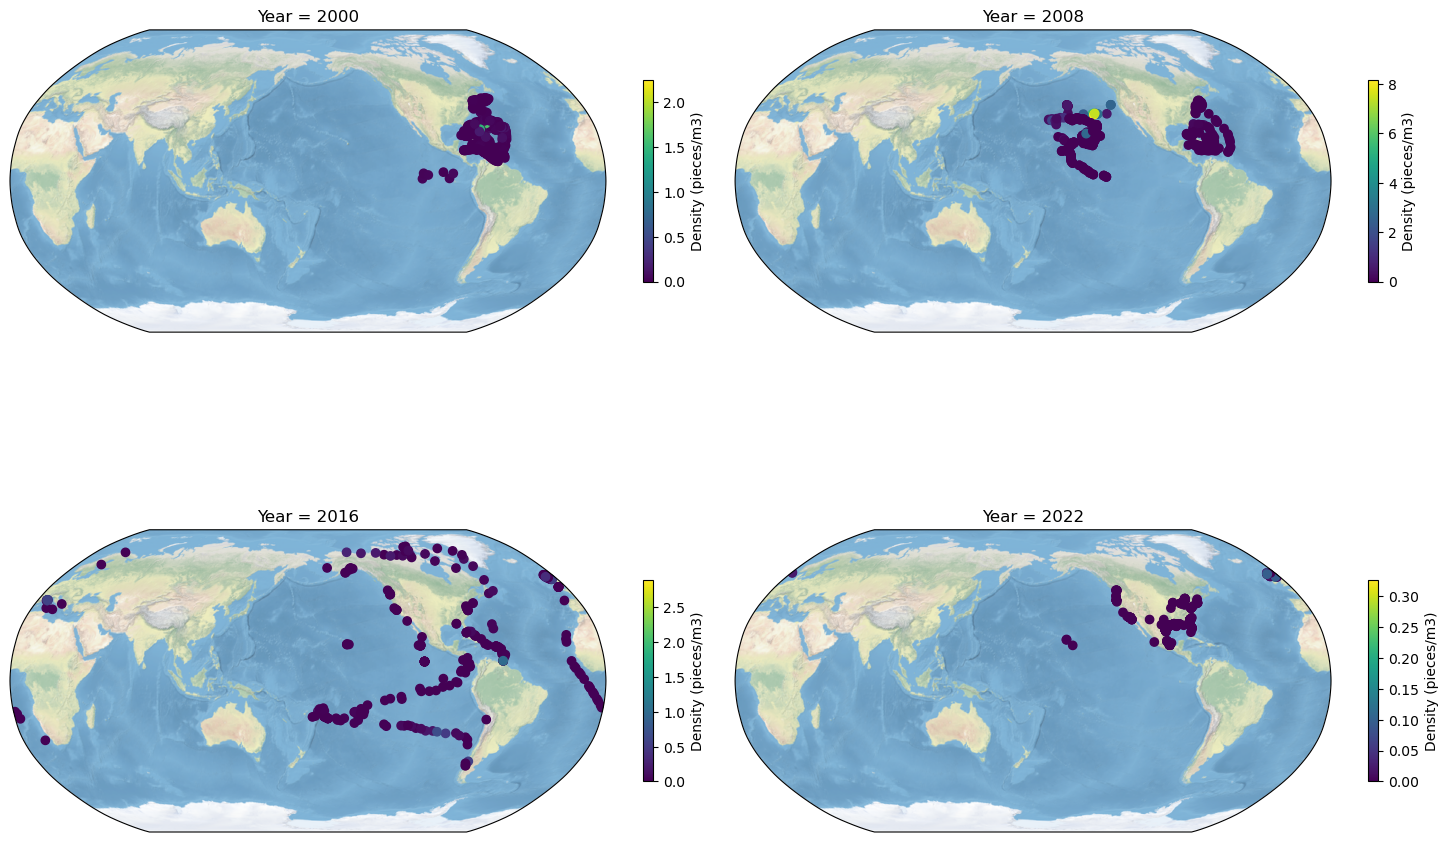

In [168]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12), subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})

#Year=2000 Map
ax = axes[0,0]
ax.stock_img()
scatter_2000 = ax.scatter(df_2000['Longitude'], df_2000['Latitude'], transform=ccrs.PlateCarree(), c=df_2000['Measurement'])

ax.set_title('Year = 2000')
colorbar_2000 = plt.colorbar(scatter_2000, ax=ax, label='Density (pieces/m3)', shrink=0.3)


#2008
ax = axes[0,1]
ax.stock_img()
scatter_2008 = ax.scatter(df_2008['Longitude'], df_2008['Latitude'], transform=ccrs.PlateCarree(), c=df_2008['Measurement'])

ax.set_title('Year = 2008')
colorbar_2008 = plt.colorbar(scatter_2008, ax=ax, label='Density (pieces/m3)', shrink=0.3)

#2016
ax = axes[1,0]
ax.stock_img()
scatter_2016 = ax.scatter(df_2016['Longitude'], df_2016['Latitude'], transform=ccrs.PlateCarree(), c=df_2016['Measurement'])

ax.set_title('Year = 2016')
colorbar_2016 = plt.colorbar(scatter_2016, ax=ax, label='Density (pieces/m3)', shrink=0.3)


#2022
ax = axes[1,1]
ax.stock_img()
scatter_2022 = ax.scatter(df_2022['Longitude'], df_2022['Latitude'], transform=ccrs.PlateCarree(), c=df_2022['Measurement'])

ax.set_title('Year = 2022')
colorbar_2022 = plt.colorbar(scatter_2022, ax=ax, label='Density (pieces/m3)', shrink=0.3)


plt.tight_layout()
plt.show()

### Finding the Total Microplsic Pollution by Ocean

Here we create sub-dataframe that indicates the total or sum of microplastic measurements by the four different types of oceans.
Then, the regular (or original sum data points) and the log scale points were plotted into a bar graph.

The bar graphs can provide more information about the areas that are the highest source of microplastic pollution.

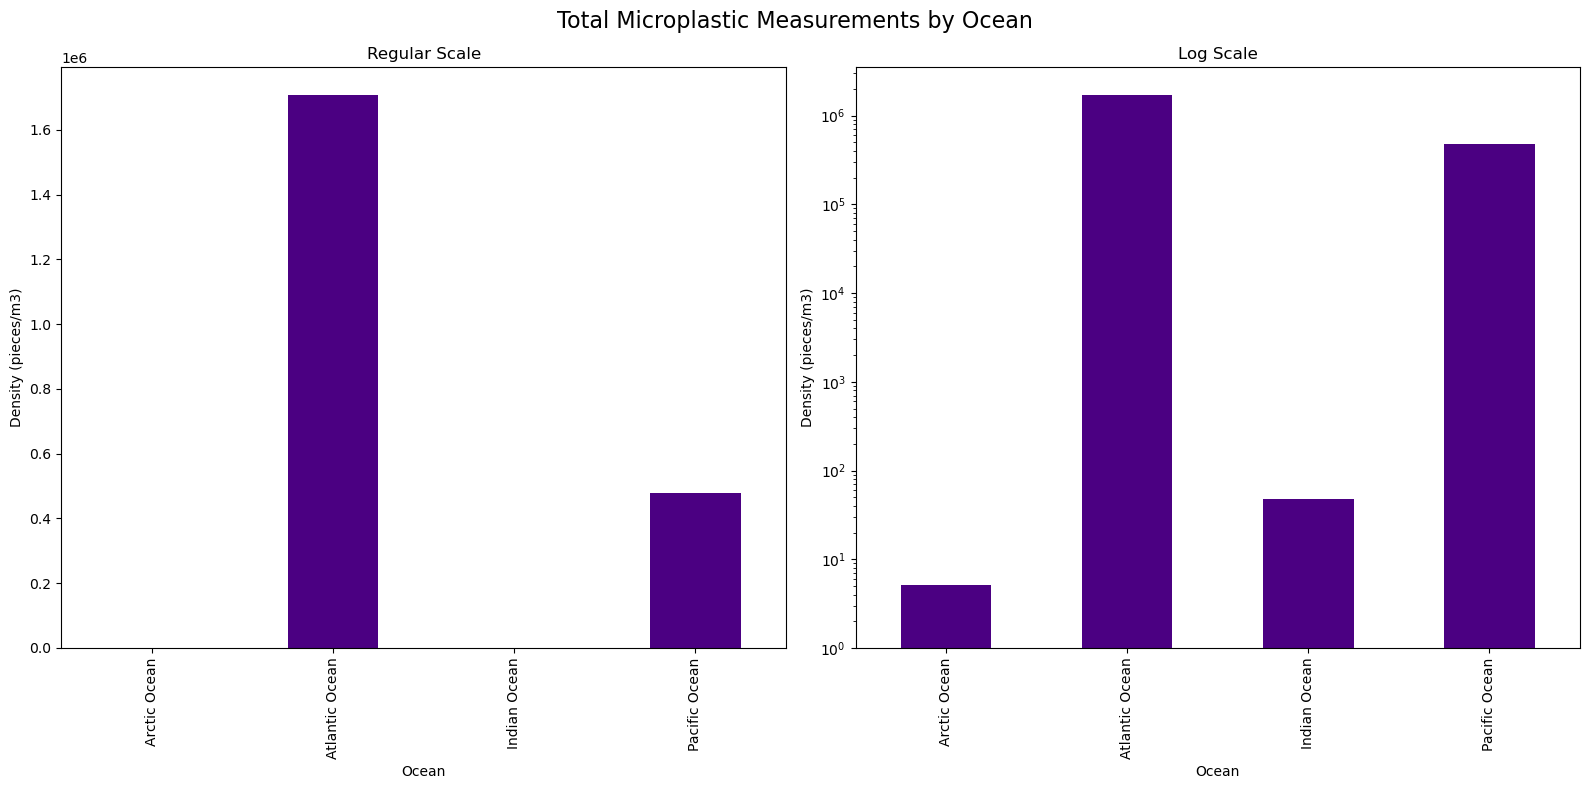

In [45]:
oceans_sum = df.groupby('Oceans')['Measurement'].sum()


# Create a subplot with two columns
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Regular plot
oceans_sum.plot(kind='bar', color='indigo', ax=axes[0])
axes[0].set_title('Regular Scale')
axes[0].set_xlabel('Ocean')
axes[0].set_ylabel('Density (pieces/m3)')

# Log plot
oceans_sum.plot(kind='bar', color='indigo', log=True, ax=axes[1])
axes[1].set_title('Log Scale')
axes[1].set_xlabel('Ocean')
axes[1].set_ylabel('Density (pieces/m3)')


fig.suptitle('Total Microplastic Measurements by Ocean', fontsize=16)

# Adjust layout to prevent overlapping


plt.tight_layout()

# Display the plot
plt.show()

### Max Measurements by Ocean

Now, the locations with maximum microplastic measurements within each ocea

In [15]:
max_measurements = df.loc[df.groupby('Oceans')['Measurement'].idxmax()]

max_measurements_df = max_measurements[['Oceans', 'Measurement', 'Latitude', 'Longitude']]

max_measurements_df

,Oceans,Measurement,Latitude,Longitude
14392,Arctic Ocean,0.366138,62.410767,5.651200
15756,Atlantic Ocean,110480.000000,28.152519,-16.431790
2211,Indian Ocean,46.000000,-37.151900,22.507900
10717,Pacific Ocean,21156.558530,23.301153,-106.488458


Text(0.5, 1.0, 'Top Microplastics Measurements in each Ocean')

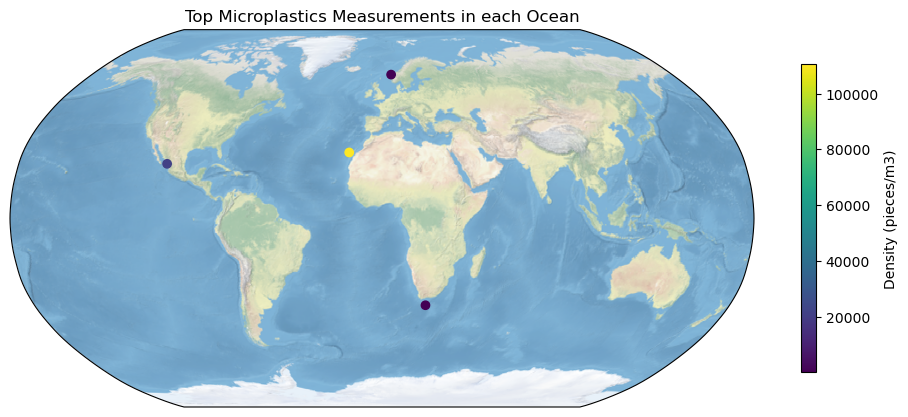

In [29]:
fig = plt.figure(figsize=(12, 8))

ax = plt.axes(projection = ccrs.Robinson())
ax.stock_img()

plt.scatter(max_measurements_df['Longitude'], max_measurements_df['Latitude'], transform=ccrs.PlateCarree(), c=max_measurements_df['Measurement'])

plt.colorbar(label='Density (pieces/m3)', shrink=0.5)
plt.title('Top Microplastics Measurements in each Ocean')


### Total and Average Microplastic Measurements by Country

The code below calculates and populates the sum and mean microplastic measurements by country. Both the mean and sums by countries were plotted into a bar graph. The log-scale bar graphs of the mean and sum were also plotted to allow for a better data representation (in frequency and variance). 

In [67]:
country_sum = df.groupby('Country')['Measurement'].sum()
country_sum

Country
Bahamas               0.000000e+00
Brazil                0.000000e+00
Canada                0.000000e+00
Chile                 0.000000e+00
Colombia              0.000000e+00
Costa Rica            0.000000e+00
Dominican Republic    0.000000e+00
Equatorial Guinea     0.000000e+00
France                0.000000e+00
Greece                0.000000e+00
Guatemala             0.000000e+00
Mexico                6.664970e+05
Spain                 1.276640e+06
Trinidad              1.044444e+01
USA                   1.111691e+05
United Kingdom        0.000000e+00
United States         0.000000e+00
Name: Measurement, dtype: float64

In [68]:
country_mean = df.groupby('Country')['Measurement'].mean()
country_mean

Country
Bahamas                   0.000000
Brazil                    0.000000
Canada                    0.000000
Chile                     0.000000
Colombia                  0.000000
Costa Rica                0.000000
Dominican Republic        0.000000
Equatorial Guinea         0.000000
France                    0.000000
Greece                    0.000000
Guatemala                 0.000000
Mexico                 1173.410141
Spain                 25532.800000
Trinidad                  0.580247
USA                    1339.386867
United Kingdom            0.000000
United States             0.000000
Name: Measurement, dtype: float64

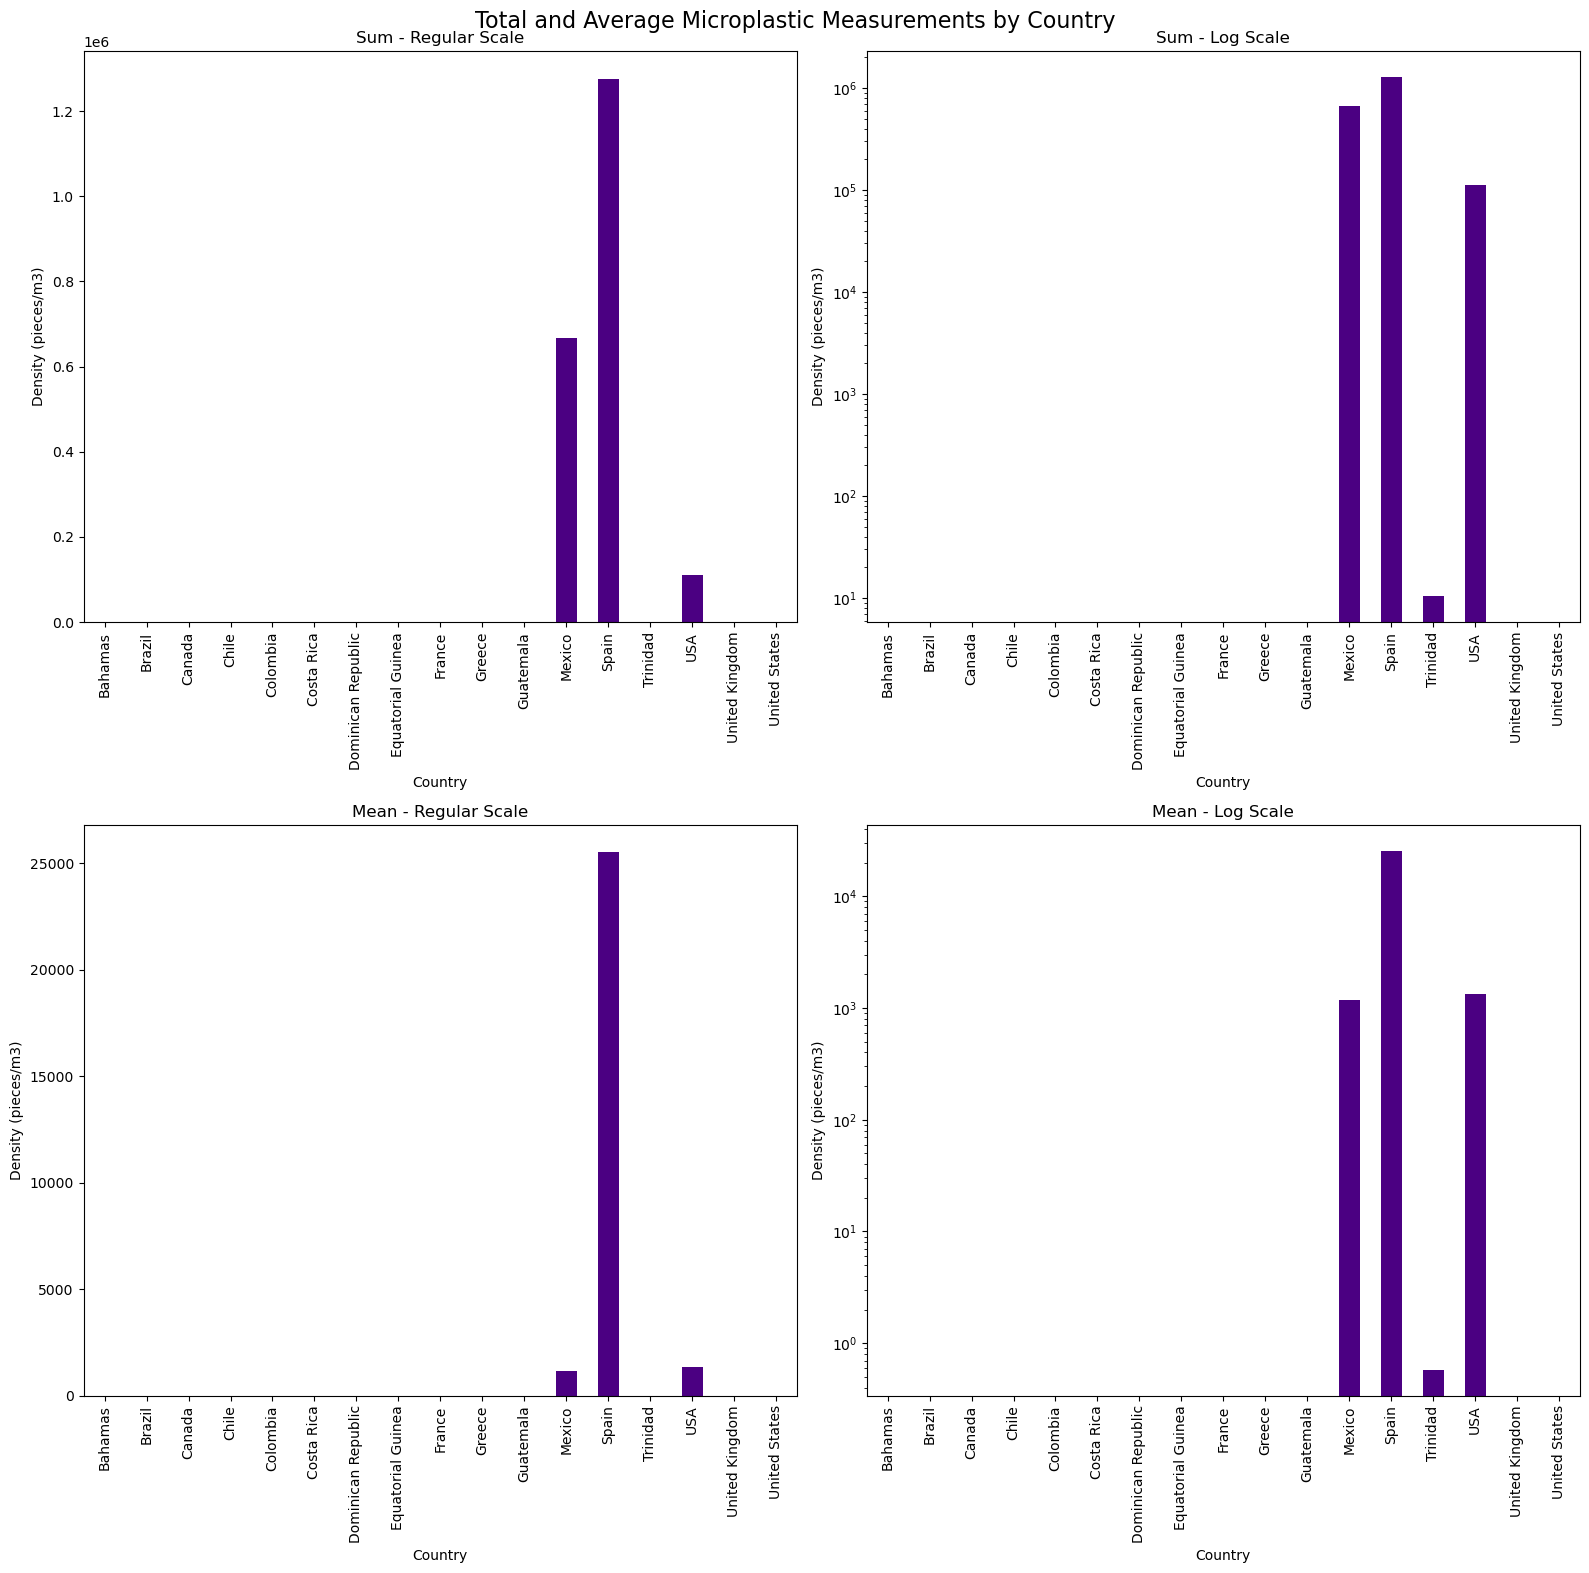

In [63]:
# Create a subplot with two columns
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

# Sum Regular plot
country_sum.plot(kind='bar', color='indigo', ax=axes[0,0])
axes[0,0].set_title('Sum - Regular Scale')
axes[0,0].set_xlabel('Country')
axes[0,0].set_ylabel('Density (pieces/m3)')

# Sum Log plot
country_sum.plot(kind='bar', color='indigo', log=True, ax=axes[0,1])
axes[0,1].set_title('Sum - Log Scale')
axes[0,1].set_xlabel('Country')
axes[0,1].set_ylabel('Density (pieces/m3)')

# Mean Regular plot
country_mean.plot(kind='bar', color='indigo', ax=axes[1,0])
axes[1,0].set_title('Mean - Regular Scale')
axes[1,0].set_xlabel('Country')
axes[1,0].set_ylabel('Density (pieces/m3)')

# Mean Log plot
country_mean.plot(kind='bar', color='indigo', log=True, ax=axes[1,1])
axes[1,1].set_title('Mean - Log Scale')
axes[1,1].set_xlabel('Country')
axes[1,1].set_ylabel('Density (pieces/m3)')

fig.suptitle('Total and Average Microplastic Measurements by Country', fontsize=16)

# Adjust layout to prevent overlapping and display the plot.
plt.tight_layout()
plt.show()

### Aggregating Data to Compute Daily and Yearly Totals and Averages

First, a new dataframe, df2, was created using the same data (to avoid any issues that may affect the plots/maps made above).

Next, the daily and the yearly sum and means of the data were calculated accordingly by forming the daily and yearly aggregated subset data. The "resample('D')", "resample('Y')", and "agg()" functions were used.

Finally, new subset datas of the yearly and daily sum/total were created and plotted onto a line graph.

In [76]:
df2 = pd.read_csv('/home/an691/rcaes/final_project_AmulyaNagella/MarineMicroplastics.csv', parse_dates=['Date'])
df2['Measurement'] = df2['Measurement'].fillna(0)
df2.set_index('Date', inplace=True)
df2

/tmp/ipykernel_155564/4055040492.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2 = pd.read_csv('/home/an691/rcaes/final_project_AmulyaNagella/MarineMicroplastics.csv', parse_dates=['Date'])


,FID,Latitude,Longitude,Oceans,Regions,SubRegions,Measurement,Unit,Density Range,Density Class,...,Sediment Sample Depth (m),Transect Number,Sampling Point on Beach,Volunteers Number,Collecting Time (min),State,Country,Marine Setting,x,y
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-22,96165,-29.948200,-20.712000,Atlantic Ocean,NaN,NaN,1.084698,pieces/m3,1-10,High,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-2.305649e+06,-3.496893e+06
2007-05-18,91256,3.480000,-143.620000,Pacific Ocean,NaN,NaN,0.000000,pieces/m3,0-0.0005,Very Low,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-1.598771e+07,3.876302e+05
2012-11-17,93248,4.410000,-145.740000,Pacific Ocean,NaN,NaN,0.001596,pieces/m3,0.0005-0.005,Low,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-1.622370e+07,4.914044e+05
2018-10-20,97754,3.652681,-49.193139,Atlantic Ocean,NaN,NaN,703.000000,pieces/m3,>=10,Very High,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-5.476155e+06,4.068903e+05
2002-03-21,92513,20.570000,-155.540000,Pacific Ocean,NaN,NaN,0.002160,pieces/m3,0.0005-0.005,Low,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-1.731463e+07,2.340679e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001-07-06,90568,34.560000,-66.130000,Atlantic Ocean,NaN,NaN,0.030236,pieces/m3,0.005-1,Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-7.361558e+06,4.104247e+06
2015-07-14,92993,73.626500,-81.362900,Arctic Ocean,Northwestern Passages,NaN,0.030000,pieces/m3,0.005-1,Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-9.057277e+06,1.236639e+07
2007-02-18,88759,25.630000,-76.980000,Atlantic Ocean,NaN,NaN,0.021600,pieces/m3,0.005-1,Medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean water,-8.569374e+06,2.953327e+06


In [81]:
# Resample the subset data by day, month, or year and aggregate using sum, mean, etc.
# You can choose the frequency ('D' for day, 'M' for month, 'Y' for year) and the aggregation method
# Here, we are calculating the sum and mean for each day
daily_aggregated = df2.resample('D').agg({'Measurement': ['sum', 'mean']})

# Reset the index to have the 'date' as a regular column
daily_aggregated.reset_index(inplace=True)

daily_aggregated

Date Measurement          
                        sum      mean
0    2000-01-05    0.004320  0.004320
1    2000-01-06    0.004320  0.001080
2    2000-01-07    0.000000       NaN
3    2000-01-08    0.000000       NaN
4    2000-01-09    0.000000       NaN
...         ...         ...       ...
8361 2022-11-26    0.000000       NaN
8362 2022-11-27    0.000000       NaN
8363 2022-11-28    0.000000       NaN
8364 2022-11-29    0.000000       NaN
8365 2022-11-30    0.631212  0.126242

[8366 rows x 3 columns]

In [85]:
# Here, we are calculating the sum and mean for each day
yearly_aggregated = df2.resample('Y').agg({'Measurement': ['sum', 'mean']})

# Reset the index to have the 'date' as a regular column
yearly_aggregated.reset_index(inplace=True)

yearly_aggregated

Date   Measurement            
                        sum        mean
0  2000-12-31  1.786573e+01    0.040148
1  2001-12-31  1.298608e+01    0.027397
2  2002-12-31  1.037851e+01    0.023270
3  2003-12-31  7.716152e+00    0.018416
4  2004-12-31  1.384142e+01    0.034517
5  2005-12-31  2.869468e+01    0.058323
6  2006-12-31  1.275105e+01    0.037614
7  2007-12-31  3.886128e+01    0.087723
8  2008-12-31  8.748896e+01    0.198839
9  2009-12-31  6.219669e+02    1.480874
10 2010-12-31  1.344882e+02    0.440945
11 2011-12-31  1.381656e+02    0.286651
12 2012-12-31  1.946897e+02    0.591762
13 2013-12-31  4.354621e+02    1.595099
14 2014-12-31  9.679600e+02    0.920114
15 2015-12-31  1.887808e+03    1.779272
16 2016-12-31  2.144173e+01    0.071711
17 2017-12-31  5.423028e+03   18.508627
18 2018-12-31  7.871301e+05  912.085876
19 2019-12-31  1.277840e+06  508.289390
20 2020-12-31  5.618134e+04   37.034502
21 2021-12-31  5.595711e+04   29.701229
22 2022-12-31  2.677276e+00    0.002809

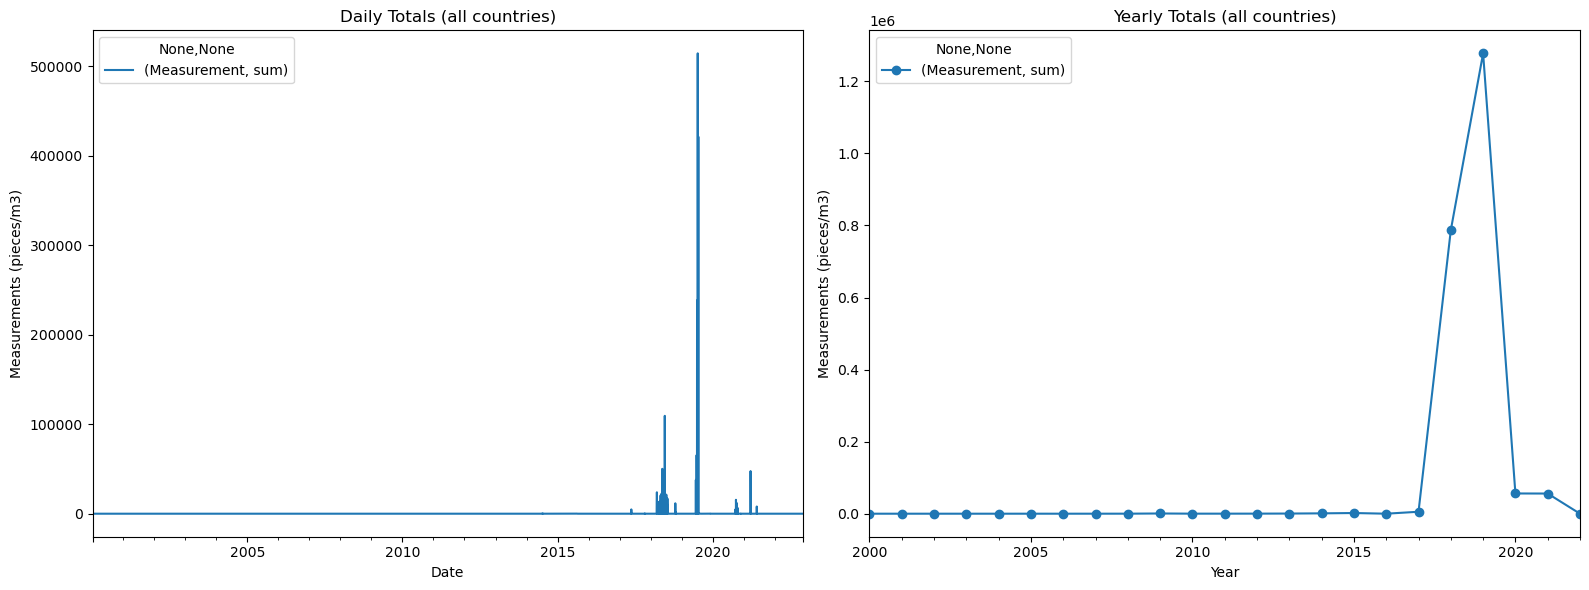

In [89]:
yearly_total = df2.resample('Y').agg({'Measurement': ['sum']})
daily_total = df2.resample('D').agg({'Measurement': ['sum']})

# Plot the daily and yearly data side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot the daily data
daily_total.plot(ax=axes[0], kind='line', title='Daily Totals (all countries)', legend=True)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Measurements (pieces/m3)')

# Plot the yearly data
yearly_total.plot(ax=axes[1], kind='line', marker='o', title='Yearly Totals (all countries)', legend=True)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Measurements (pieces/m3)')

plt.tight_layout()
plt.show()

### Time-Series Analysis

First, a new dataframe, df3, was created using the same data (to avoid any issues that may affect the plots/maps made above).

From previous analysis (totals by country), it was indicated that microplastics data was recorded only for the following countries in the past decade: mexico, spain, trinidad, and usa.

Therefore, next, seperate sub-dataframes for each of the four countries was created. The yearly sums for each of the country's subset dataframes were also computed and populated into another sub-dataframe.

Finally, the yearly sums of the four countries were plotted into a line graph and a pie chart over time in years.

In [ ]:
df3 = pd.read_csv('/home/an691/rcaes/final_project_AmulyaNagella/MarineMicroplastics.csv', parse_dates=['Date'])
df3['Measurement'] = df3['Measurement'].fillna(0)

In [145]:
df_mexico = df3[df3['Country'] == 'Mexico'][['Date', 'Measurement', 'Country']]

df_mexico['Year'] = df_mexico['Date'].dt.year
df_mexico_yearly_sum = df_mexico.groupby(['Year', 'Country'])['Measurement'].sum()
df_mexico_yearly_sum

Year  Country
2018  Mexico     666496.959848
2019  Mexico          0.000000
2020  Mexico          0.000000
2021  Mexico          0.000000
2022  Mexico          0.000000
Name: Measurement, dtype: float64

In [146]:
df_spain = df[df['Country'] == 'Spain'][['Date', 'Measurement', 'Country']]

df_spain['Year'] = df_spain['Date'].dt.year
df_spain_yearly_sum = df_spain.groupby(['Year', 'Country'])['Measurement'].sum()
df_spain_yearly_sum

Year  Country
2019  Spain      1276640.0
Name: Measurement, dtype: float64

In [147]:
df_trinidad = df[df['Country'] == 'Trinidad'][['Date', 'Measurement', 'Country']]

df_trinidad['Year'] = df_trinidad['Date'].dt.year
df_trinidad_yearly_sum = df_trinidad.groupby(['Year', 'Country'])['Measurement'].sum()
df_trinidad_yearly_sum

Year  Country 
2015  Trinidad    4.444445
2016  Trinidad    6.000000
Name: Measurement, dtype: float64

In [148]:
df_usa = df[df['Country'] == 'USA'][['Date', 'Measurement', 'Country']]

df_usa['Year'] = df_usa['Date'].dt.year
df_usa_yearly_sum = df_usa.groupby(['Year', 'Country'])['Measurement'].sum()
df_usa_yearly_sum

Year  Country
2020  USA        55547.11
2021  USA        55622.00
Name: Measurement, dtype: float64

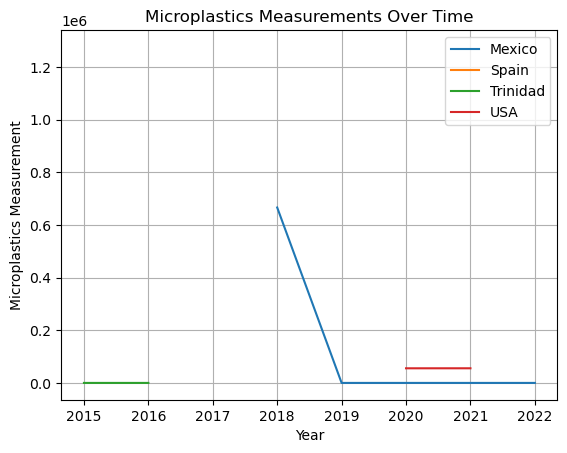

In [172]:
# Plot each country's data
for i, country_df in enumerate([df_mexico_yearly_sum, df_spain_yearly_sum, df_trinidad_yearly_sum, df_usa_yearly_sum]):
    country = country_df.index.get_level_values('Country')[0]  # Get the country name from the index
    plt.plot(country_df.index.get_level_values('Year'), country_df.values, label=country)

# Customize the plot
plt.title('Microplastics Measurements Over Time')
plt.xlabel('Year')
plt.ylabel('Microplastics Measurement')
plt.legend()
plt.grid(True)
plt.show()

Comment of plot results:

There is a lot of missing data within the dataframe for all the countries. Therefore, this graph is not a good representation of a time-series analysis for all the countries.

In [160]:
total_sum_mexico = df_mexico['Measurement'].sum()
total_sum_spain = df_spain['Measurement'].sum()
total_sum_trinidad = df_trinidad['Measurement'].sum()
total_sum_usa = df_usa['Measurement'].sum()

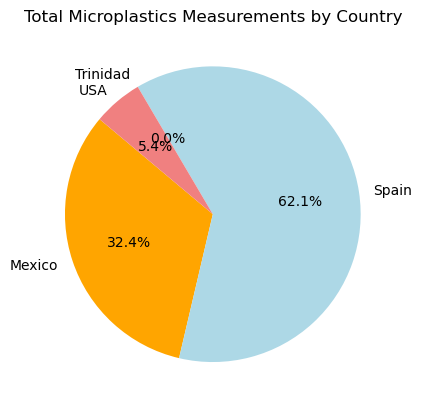

In [161]:
labels = ['Mexico', 'Spain', 'Trinidad', 'USA']
sizes = [total_sum_mexico, total_sum_spain, total_sum_trinidad, total_sum_usa]
colors = ['orange', 'lightblue', 'lightgreen', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Total Microplastics Measurements by Country')
plt.show()

Comment of the Pie Chart:

This chart is a better representation of the total microplastics measurement records from the four countries (only countries that have data from the past 2 decades). The chart indictes trinidad as 0% even through it has a total microplastic measurement of 10.4 pieces/m3, it is just significantly lower than the other countries' totals.